Presentación final
El objetivo de las presentaciones es que aprendan a buscar y poblar ustedes sus propios datasets con el fin de crear valor a partir de los datos.
Serán en parejas, tendrán hasta el lunes 12 de junio a las 23:59 para subirla a Aula y serán el miércoles 14 de junio. Deberán presentar entre 5 y 7
minutos más 3 minutos máximo para responder preguntas.
Para ello se debe trabajar con los sitios Web of Science y Scopus. Para acceder a los repositorios deben entrar al link Bibliotecas PUCV. En la
sección “A un click” deben seleccionar Web of Science o Scopus dentro de la columna Bases de datos multidisciplinarias e ingresar con su correo
@mail.pucv.cl.
Los temas a trabajar deben tener relación con la carrera (ej: machine learning aplicado en medicina).
Para generar el dataset con los resultados de la búsqueda seleccionar el cuadro “Export”.
Para escoger las columnas para poblar el dataset seleccionar la opción Excel o CSV, luego asegurarse de que las columnas seleccionadas sean las
mismas que en las siguientes imágenes y exportar:
Para Web of Science
Para Scopus
Generar un archivo que contenga los primeros 1000 registros para cada caso y concatenar los archivos resultantes en uno solo.
Como primera instancia de preprocesamiento deberán eliminar los registros duplicados según DOI (Digital Object Identifier), que corresponde a
un valor único asignado a cada publicación.
Lo que se evaluará:
1. Introducción al tema que eligieron (contextualización) + review del paper de mayor impacto 1pt
2. Preprocesamiento de los datos (registros duplicados, manejo de nulos, etc) 1pt
3. Estadísticos básicos del dataset ya preprocesado (resultados con los que puedan obtener conclusiones) 1pt
4. Gráficos (al menos 3 distintos y que aporten a la visualización de información de valor) 1pt
5. Expresión oral (manejo de lenguaje formal) 1pt
6. Presentación (ppt, colab, otros) 1pt
7. Comunicación no verbal (postura, acciones) 1p

In [106]:
!pip install xlrd
!pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [107]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [108]:
#ver librerias dentro de la carpeta
os.listdir()

['.~lock.savedrecs.xls#',
 'scopus.csv',
 'savedrecs.xls',
 'AstorgaIgnacioPresentacion.ipynb']

In [109]:
scopus = pd.read_csv('scopus.csv')
print(scopus.shape)
scopus = scopus.drop_duplicates(subset=['DOI'])
print(scopus.shape)
scopus = scopus.dropna(axis=1, how='all')
print(scopus.shape)
print(scopus.columns)

(1000, 14)
(873, 14)
(873, 14)
Index(['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year',
       'Source title', 'Cited by', 'DOI', 'Link', 'Abstract',
       'Molecular Sequence Numbers', 'Chemicals/CAS', 'Document Type',
       'Source'],
      dtype='object')


In [110]:
# archivo de excel savedrecs.xls 
webofscience = pd.read_excel('savedrecs.xls', engine='xlrd')
print(webofscience.shape)
print(webofscience.columns)
webofscience = webofscience.drop_duplicates(subset=['DOI'])
webofscience.head()

(1000, 72)
Index(['Publication Type', 'Authors', 'Book Authors', 'Book Editors',
       'Book Group Authors', 'Author Full Names', 'Book Author Full Names',
       'Group Authors', 'Article Title', 'Source Title', 'Book Series Title',
       'Book Series Subtitle', 'Language', 'Document Type', 'Conference Title',
       'Conference Date', 'Conference Location', 'Conference Sponsor',
       'Conference Host', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses', 'Affiliations', 'Reprint Addresses', 'Email Addresses',
       'Researcher Ids', 'ORCIDs', 'Funding Orgs', 'Funding Name Preferred',
       'Funding Text', 'Cited References', 'Cited Reference Count',
       'Times Cited, WoS Core', 'Times Cited, All Databases',
       '180 Day Usage Count', 'Since 2013 Usage Count', 'Publisher',
       'Publisher City', 'Publisher Address', 'ISSN', 'eISSN', 'ISBN',
       'Journal Abbreviation', 'Journal ISO Abbreviation', 'Publication Date',
       'Publication Year', 'Volume', '

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Kallens, PC; Kristensen-McLachlan, RD; Christi...",NaN,NaN,NaN,"Contreras Kallens, Pablo; Kristensen-McLachlan...",NaN,NaN,Large Language Models Demonstrate the Potentia...,COGNITIVE SCIENCE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31,WOS:000939418000001,0
1,J,"Kim, KH; Jung, DY; Lee, D; Lee, HJ; Park, SY; ...",NaN,NaN,NaN,"Kim, Kwang-Ho; Jung, Dae-Young; Lee, Donghyun;...",NaN,NaN,Implementation of a large-scale language model...,MULTIMEDIA TOOLS AND APPLICATIONS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31,WOS:000376601700012,0
2,J,"Leippold, M",NaN,NaN,NaN,"Leippold, Markus",NaN,NaN,Thus spoke GPT-3: Interviewing a large-languag...,FINANCE RESEARCH LETTERS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31,WOS:000956118300001,0
3,J,"Veres, C",NaN,NaN,NaN,"Veres, Csaba",NaN,NaN,Large Language Models are Not Models of Natura...,IEEE ACCESS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31,WOS:000812546700001,0
4,J,"Kasneci, E; Sessler, K; Kuchemann, S; Bannert,...",NaN,NaN,NaN,"Kasneci, Enkelejda; Sessler, Kathrin; Kuechema...",NaN,NaN,ChatGPT for good? On opportunities and challen...,LEARNING AND INDIVIDUAL DIFFERENCES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31,WOS:000961991400001,0


In [111]:
webofscience

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Kallens, PC; Kristensen-McLachlan, RD; Christi...",NaN,NaN,NaN,"Contreras Kallens, Pablo; Kristensen-McLachlan...",NaN,NaN,Large Language Models Demonstrate the Potentia...,COGNITIVE SCIENCE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31,WOS:000939418000001,0
1,J,"Kim, KH; Jung, DY; Lee, D; Lee, HJ; Park, SY; ...",NaN,NaN,NaN,"Kim, Kwang-Ho; Jung, Dae-Young; Lee, Donghyun;...",NaN,NaN,Implementation of a large-scale language model...,MULTIMEDIA TOOLS AND APPLICATIONS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31,WOS:000376601700012,0
2,J,"Leippold, M",NaN,NaN,NaN,"Leippold, Markus",NaN,NaN,Thus spoke GPT-3: Interviewing a large-languag...,FINANCE RESEARCH LETTERS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31,WOS:000956118300001,0
3,J,"Veres, C",NaN,NaN,NaN,"Veres, Csaba",NaN,NaN,Large Language Models are Not Models of Natura...,IEEE ACCESS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31,WOS:000812546700001,0
4,J,"Kasneci, E; Sessler, K; Kuchemann, S; Bannert,...",NaN,NaN,NaN,"Kasneci, Enkelejda; Sessler, Kathrin; Kuechema...",NaN,NaN,ChatGPT for good? On opportunities and challen...,LEARNING AND INDIVIDUAL DIFFERENCES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31,WOS:000961991400001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,J,"Wang, T; Shen, Y; Chen, TM; Ji, BY; Zhu, TT; L...",NaN,NaN,NaN,"Wang, Ting; Shen, Yan; Chen, Tieming; Ji, Baiy...",NaN,NaN,Language Inclusion Checking of Timed Automata ...,APPLIED SCIENCES-BASEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31,WOS:000902090100001,0
996,J,"Roelens, B; Poels, G",NaN,NaN,NaN,"Roelens, Ben; Poels, Geert",NaN,NaN,The Development and Experimental Evaluation of...,BUSINESS & INFORMATION SYSTEMS ENGINEERING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31,WOS:000352051600007,0
997,J,"Pulvermuller, F",NaN,NaN,NaN,"Pulvermueller, Friedemann",NaN,NaN,Neural reuse of action perception circuits for...,PROGRESS IN NEUROBIOLOGY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31,WOS:000419810400001,0
998,J,"Ma, R; Patil, AG; Fisher, M; Li, MY; Pirk, S; ...",NaN,NaN,NaN,"Ma, Rui; Patil, Akshay Gadi; Fisher, Matthew; ...",NaN,NaN,Language-Driven Synthesis of 3D Scenes from Sc...,ACM TRANSACTIONS ON GRAPHICS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31,WOS:000455953100035,0


In [112]:
webofscience = webofscience.dropna(axis=1, how='all')
webofscience = webofscience.drop_duplicates(subset=['DOI'])

In [113]:
print(webofscience.shape)
print(webofscience.columns)

(940, 37)
Index(['Publication Type', 'Authors', 'Book Editors', 'Author Full Names',
       'Group Authors', 'Article Title', 'Source Title', 'Book Series Title',
       'Document Type', 'Conference Title', 'Conference Date',
       'Conference Location', 'Conference Host', 'Abstract', 'Addresses',
       'Reprint Addresses', 'Email Addresses', 'Times Cited, WoS Core',
       'Times Cited, All Databases', 'Publication Date', 'Publication Year',
       'Volume', 'Issue', 'Part Number', 'Supplement', 'Special Issue',
       'Start Page', 'End Page', 'Article Number', 'DOI', 'DOI Link',
       'Early Access Date', 'Highly Cited Status', 'Hot Paper Status',
       'Date of Export', 'UT (Unique WOS ID)', 'Web of Science Record'],
      dtype='object')


In [114]:
scopus = scopus.rename(columns={
    'Author full names': 'Author Full Names',
    'Title': 'Article Title',
    'Source title': 'Source Title',
    'Cited by': 'Times Cited, All Databases',
    'DOI': 'DOI',
    'Link': 'DOI Link',
    'Abstract': 'Abstract',
    'Document Type': 'Document Type'
})

webofscience = webofscience.rename(columns={
    'Authors': 'Authors',
    'Author Full Names': 'Author Full Names',
    'Article Title': 'Article Title',
    'Source Title': 'Source Title',
    'Times Cited, All Databases': 'Times Cited, All Databases',
    'DOI': 'DOI',
    'DOI Link': 'DOI Link',
    'Abstract': 'Abstract',
    'Document Type': 'Document Type'
})

print(scopus.columns)
print(webofscience.columns)


dataframe = pd.concat([scopus, webofscience], axis=0, ignore_index=True)


Index(['Authors', 'Author Full Names', 'Author(s) ID', 'Article Title', 'Year',
       'Source Title', 'Times Cited, All Databases', 'DOI', 'DOI Link',
       'Abstract', 'Molecular Sequence Numbers', 'Chemicals/CAS',
       'Document Type', 'Source'],
      dtype='object')
Index(['Publication Type', 'Authors', 'Book Editors', 'Author Full Names',
       'Group Authors', 'Article Title', 'Source Title', 'Book Series Title',
       'Document Type', 'Conference Title', 'Conference Date',
       'Conference Location', 'Conference Host', 'Abstract', 'Addresses',
       'Reprint Addresses', 'Email Addresses', 'Times Cited, WoS Core',
       'Times Cited, All Databases', 'Publication Date', 'Publication Year',
       'Volume', 'Issue', 'Part Number', 'Supplement', 'Special Issue',
       'Start Page', 'End Page', 'Article Number', 'DOI', 'DOI Link',
       'Early Access Date', 'Highly Cited Status', 'Hot Paper Status',
       'Date of Export', 'UT (Unique WOS ID)', 'Web of Science Record'],


In [115]:
print(dataframe.shape)
print(dataframe.columns)

(1813, 42)
Index(['Authors', 'Author Full Names', 'Author(s) ID', 'Article Title', 'Year',
       'Source Title', 'Times Cited, All Databases', 'DOI', 'DOI Link',
       'Abstract', 'Molecular Sequence Numbers', 'Chemicals/CAS',
       'Document Type', 'Source', 'Publication Type', 'Book Editors',
       'Group Authors', 'Book Series Title', 'Conference Title',
       'Conference Date', 'Conference Location', 'Conference Host',
       'Addresses', 'Reprint Addresses', 'Email Addresses',
       'Times Cited, WoS Core', 'Publication Date', 'Publication Year',
       'Volume', 'Issue', 'Part Number', 'Supplement', 'Special Issue',
       'Start Page', 'End Page', 'Article Number', 'Early Access Date',
       'Highly Cited Status', 'Hot Paper Status', 'Date of Export',
       'UT (Unique WOS ID)', 'Web of Science Record'],
      dtype='object')


In [116]:
# Paso 1: Eliminación de columnas redundantes
# dataframe = dataframe.drop(['Publication Year', 'Article Title'], axis=1)

# Paso 2: Manejo de valores perdidos
# Eliminar columnas con más del 50% de valores NaN
half_count = len(dataframe) / 2
dataframe = dataframe.dropna(thresh=half_count, axis=1)

# O alternativamente, rellenar los valores NaN con un valor por defecto
# dataframe = dataframe.fillna("Valor por defecto")

# Paso 3: Eliminación de filas que no sirven para el análisis, identificadas manualmente
dataframe = dataframe.drop(['Publication Type', 'Addresses', 'Reprint Addresses', 'DOI Link', 'Times Cited, WoS Core', 'Date of Export', 'UT (Unique WOS ID)', 'Web of Science Record'], axis=1)


# Paso 4: Eliminación de duplicados
# Eliminar duplicados
print(dataframe.shape)
dataframe = dataframe.drop_duplicates()
print(dataframe.shape)


(1813, 9)
(1813, 9)


In [117]:
dataframe

,Authors,Author Full Names,Article Title,Source Title,"Times Cited, All Databases",DOI,Abstract,Document Type,Publication Year
0,Delaglio F.; Grzesiek S.; Vuister G.W.; Zhu G....,"Delaglio, Frank (6603722428); Grzesiek, Stepha...",NMRPipe: A multidimensional spectral processin...,Journal of Biomolecular NMR,11644,10.1007/BF00197809,The NMRPipe system is a UNIX software environm...,Article,NaN
1,Srivastava N.; Hinton G.; Krizhevsky A.; Sutsk...,"Srivastava, Nitish (55697473300); Hinton, Geof...",Dropout: A simple way to prevent neural networ...,Journal of Machine Learning Research,25310,NaN,Deep neural nets with a large number of parame...,Article,NaN
2,Jumper J.; Evans R.; Pritzel A.; Green T.; Fig...,"Jumper, John (36717725300); Evans, Richard (57...",Highly accurate protein structure prediction w...,Nature,6981,10.1038/s41586-021-03819-2,"Proteins are essential to life, and understand...",Article,NaN
3,Wild S.; Roglic G.; Green A.; Sicree R.; King H.,"Wild, Sarah (7103086309); Roglic, Gojka (67016...",Global Prevalence of Diabetes: Estimates for t...,Diabetes Care,12069,10.2337/diacare.27.5.1047,OBJECTIVE - The goal of this study was to esti...,Article,NaN
4,Cover T.M.; Thomas J.A.,"Cover, Thomas M. (7102102743); Thomas, Joy A. ...",Elements of Information Theory,Elements of Information Theory,33728,10.1002/047174882X,The latest edition of this classic is updated ...,Book,NaN
...,...,...,...,...,...,...,...,...,...
1808,"Wang, T; Shen, Y; Chen, TM; Ji, BY; Zhu, TT; L...","Wang, Ting; Shen, Yan; Chen, Tieming; Ji, Baiy...",Language Inclusion Checking of Timed Automata ...,APPLIED SCIENCES-BASEL,0,10.3390/app122412946,The language inclusion checking of timed autom...,Article,2022.0
1809,"Roelens, B; Poels, G","Roelens, Ben; Poels, Geert",The Development and Experimental Evaluation of...,BUSINESS & INFORMATION SYSTEMS ENGINEERING,7,10.1007/s12599-014-0363-z,Business models (BM) are the central concept t...,Article,2015.0
1810,"Pulvermuller, F","Pulvermueller, Friedemann",Neural reuse of action perception circuits for...,PROGRESS IN NEUROBIOLOGY,104,10.1016/j.pneurobio.2017.07.001,Neurocognitive and neurolinguistics theories m...,Review,2018.0
1811,"Ma, R; Patil, AG; Fisher, M; Li, MY; Pirk, S; ...","Ma, Rui; Patil, Akshay Gadi; Fisher, Matthew; ...",Language-Driven Synthesis of 3D Scenes from Sc...,ACM TRANSACTIONS ON GRAPHICS,21,10.1145/3272127.3275035,We introduce a novel framework for using natur...,Article; Proceedings Paper,2018.0


In [118]:
print(dataframe)
print(dataframe.shape)

# Publication Type
# Addresses
# Reprint Addresses	
# DOI Link	
# Times Cited, WoS Core
# Date of Export
#UT (Unique WOS ID)
#Web of Science Record

print(dataframe.columns)

                                                Authors   
0     Delaglio F.; Grzesiek S.; Vuister G.W.; Zhu G....  \
1     Srivastava N.; Hinton G.; Krizhevsky A.; Sutsk...   
2     Jumper J.; Evans R.; Pritzel A.; Green T.; Fig...   
3      Wild S.; Roglic G.; Green A.; Sicree R.; King H.   
4                               Cover T.M.; Thomas J.A.   
...                                                 ...   
1808  Wang, T; Shen, Y; Chen, TM; Ji, BY; Zhu, TT; L...   
1809                               Roelens, B; Poels, G   
1810                                    Pulvermuller, F   
1811  Ma, R; Patil, AG; Fisher, M; Li, MY; Pirk, S; ...   
1812  Gay, D; Levis, P; von Behren, R; Welsh, M; Bre...   

                                      Author Full Names   
0     Delaglio, Frank (6603722428); Grzesiek, Stepha...  \
1     Srivastava, Nitish (55697473300); Hinton, Geof...   
2     Jumper, John (36717725300); Evans, Richard (57...   
3     Wild, Sarah (7103086309); Roglic, Gojka (67016...

In [119]:
print(dataframe.shape)
dataframe = dataframe.drop_duplicates(subset=['DOI'])
print(dataframe.shape)

# contar los valores nulos en DOI
dataframe['DOI'].isnull().sum()

# realizar un drop de los valores nulos en DOI
dataframe = dataframe.dropna(subset=['DOI'])

(1813, 9)
(1811, 9)


In [120]:
dataframe.describe()

,"Times Cited, All Databases",Publication Year
count,1810.000000,938.000000
mean,1428.613260,2015.922175
std,3002.283907,7.299897
min,0.000000,1991.000000
25%,4.000000,2012.000000
50%,95.500000,2019.000000
75%,1793.750000,2022.000000
max,44908.000000,2023.000000


In [121]:
most_cited_paper = dataframe[dataframe['Times Cited, All Databases'] == dataframe['Times Cited, All Databases'].max()]
most_cited_paper


,Authors,Author Full Names,Article Title,Source Title,"Times Cited, All Databases",DOI,Abstract,Document Type,Publication Year
12,Lecun Y.; Bengio Y.; Hinton G.,"Lecun, Yann (55666793600); Bengio, Yoshua (700...",Deep learning,Nature,44908,10.1038/nature14539,Deep learning allows computational models that...,Review,NaN


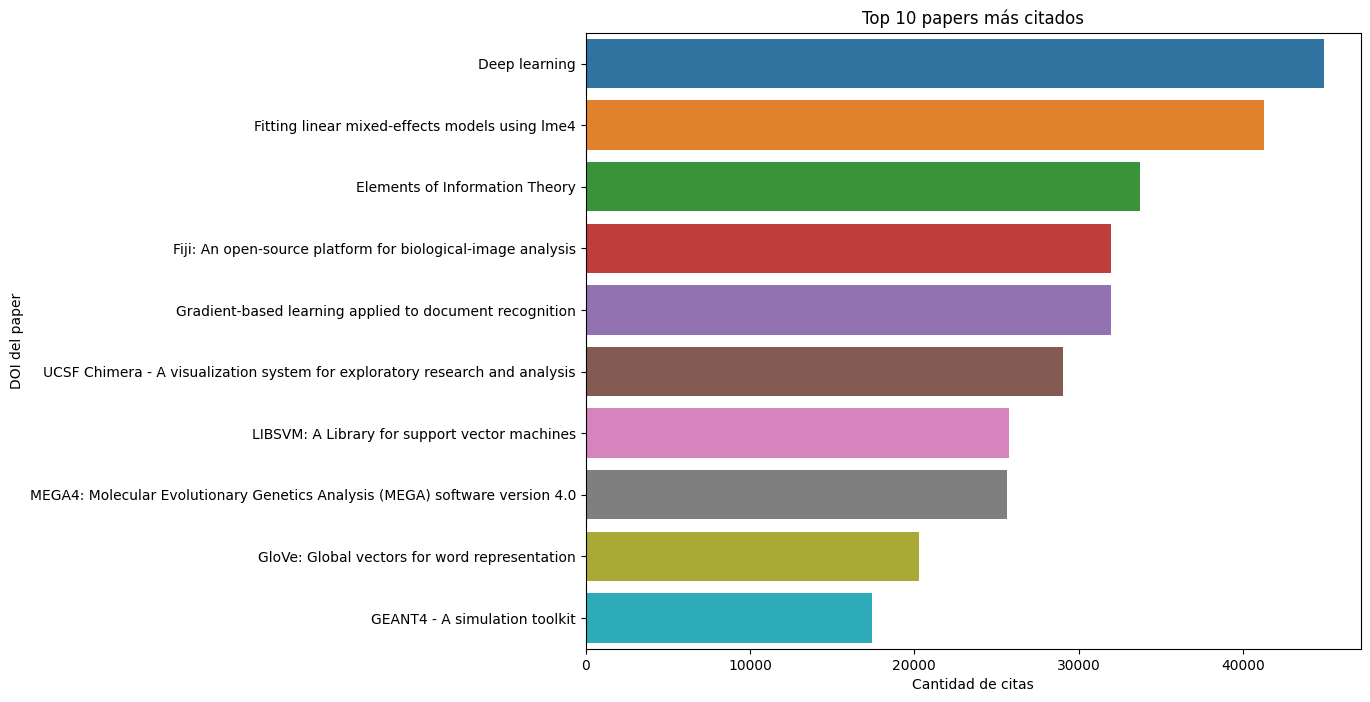

In [122]:

top_cited_papers = dataframe.nlargest(10, 'Times Cited, All Databases')

plt.figure(figsize=(10,8))
sns.barplot(x='Times Cited, All Databases', y=top_cited_papers['Article Title'], data=top_cited_papers, orient='h')
plt.title('Top 10 papers más citados')
plt.xlabel('Cantidad de citas')
plt.ylabel('DOI del paper')
plt.show()


In [123]:
print(dataframe.columns)


Index(['Authors', 'Author Full Names', 'Article Title', 'Source Title',
       'Times Cited, All Databases', 'DOI', 'Abstract', 'Document Type',
       'Publication Year'],
      dtype='object')


In [124]:
dataframe

,Authors,Author Full Names,Article Title,Source Title,"Times Cited, All Databases",DOI,Abstract,Document Type,Publication Year
0,Delaglio F.; Grzesiek S.; Vuister G.W.; Zhu G....,"Delaglio, Frank (6603722428); Grzesiek, Stepha...",NMRPipe: A multidimensional spectral processin...,Journal of Biomolecular NMR,11644,10.1007/BF00197809,The NMRPipe system is a UNIX software environm...,Article,NaN
2,Jumper J.; Evans R.; Pritzel A.; Green T.; Fig...,"Jumper, John (36717725300); Evans, Richard (57...",Highly accurate protein structure prediction w...,Nature,6981,10.1038/s41586-021-03819-2,"Proteins are essential to life, and understand...",Article,NaN
3,Wild S.; Roglic G.; Green A.; Sicree R.; King H.,"Wild, Sarah (7103086309); Roglic, Gojka (67016...",Global Prevalence of Diabetes: Estimates for t...,Diabetes Care,12069,10.2337/diacare.27.5.1047,OBJECTIVE - The goal of this study was to esti...,Article,NaN
4,Cover T.M.; Thomas J.A.,"Cover, Thomas M. (7102102743); Thomas, Joy A. ...",Elements of Information Theory,Elements of Information Theory,33728,10.1002/047174882X,The latest edition of this classic is updated ...,Book,NaN
5,LeCun Y.; Bottou L.; Bengio Y.; Haffner P.,"LeCun, Yann (55666793600); Bottou, Léon (67017...",Gradient-based learning applied to document re...,Proceedings of the IEEE,31945,10.1109/5.726791,Multilayer neural networks trained with the ba...,Article,NaN
...,...,...,...,...,...,...,...,...,...
1808,"Wang, T; Shen, Y; Chen, TM; Ji, BY; Zhu, TT; L...","Wang, Ting; Shen, Yan; Chen, Tieming; Ji, Baiy...",Language Inclusion Checking of Timed Automata ...,APPLIED SCIENCES-BASEL,0,10.3390/app122412946,The language inclusion checking of timed autom...,Article,2022.0
1809,"Roelens, B; Poels, G","Roelens, Ben; Poels, Geert",The Development and Experimental Evaluation of...,BUSINESS & INFORMATION SYSTEMS ENGINEERING,7,10.1007/s12599-014-0363-z,Business models (BM) are the central concept t...,Article,2015.0
1810,"Pulvermuller, F","Pulvermueller, Friedemann",Neural reuse of action perception circuits for...,PROGRESS IN NEUROBIOLOGY,104,10.1016/j.pneurobio.2017.07.001,Neurocognitive and neurolinguistics theories m...,Review,2018.0
1811,"Ma, R; Patil, AG; Fisher, M; Li, MY; Pirk, S; ...","Ma, Rui; Patil, Akshay Gadi; Fisher, Matthew; ...",Language-Driven Synthesis of 3D Scenes from Sc...,ACM TRANSACTIONS ON GRAPHICS,21,10.1145/3272127.3275035,We introduce a novel framework for using natur...,Article; Proceedings Paper,2018.0


In [125]:
dataframe = dataframe[['DOI', 'Source Title', 'Author Full Names', 'Document Type', 'Times Cited, All Databases', 'Abstract','Authors']]

dataframe


,DOI,Source Title,Author Full Names,Document Type,"Times Cited, All Databases",Abstract,Authors
0,10.1007/BF00197809,Journal of Biomolecular NMR,"Delaglio, Frank (6603722428); Grzesiek, Stepha...",Article,11644,The NMRPipe system is a UNIX software environm...,Delaglio F.; Grzesiek S.; Vuister G.W.; Zhu G....
2,10.1038/s41586-021-03819-2,Nature,"Jumper, John (36717725300); Evans, Richard (57...",Article,6981,"Proteins are essential to life, and understand...",Jumper J.; Evans R.; Pritzel A.; Green T.; Fig...
3,10.2337/diacare.27.5.1047,Diabetes Care,"Wild, Sarah (7103086309); Roglic, Gojka (67016...",Article,12069,OBJECTIVE - The goal of this study was to esti...,Wild S.; Roglic G.; Green A.; Sicree R.; King H.
4,10.1002/047174882X,Elements of Information Theory,"Cover, Thomas M. (7102102743); Thomas, Joy A. ...",Book,33728,The latest edition of this classic is updated ...,Cover T.M.; Thomas J.A.
5,10.1109/5.726791,Proceedings of the IEEE,"LeCun, Yann (55666793600); Bottou, Léon (67017...",Article,31945,Multilayer neural networks trained with the ba...,LeCun Y.; Bottou L.; Bengio Y.; Haffner P.
...,...,...,...,...,...,...,...
1808,10.3390/app122412946,APPLIED SCIENCES-BASEL,"Wang, Ting; Shen, Yan; Chen, Tieming; Ji, Baiy...",Article,0,The language inclusion checking of timed autom...,"Wang, T; Shen, Y; Chen, TM; Ji, BY; Zhu, TT; L..."
1809,10.1007/s12599-014-0363-z,BUSINESS & INFORMATION SYSTEMS ENGINEERING,"Roelens, Ben; Poels, Geert",Article,7,Business models (BM) are the central concept t...,"Roelens, B; Poels, G"
1810,10.1016/j.pneurobio.2017.07.001,PROGRESS IN NEUROBIOLOGY,"Pulvermueller, Friedemann",Review,104,Neurocognitive and neurolinguistics theories m...,"Pulvermuller, F"
1811,10.1145/3272127.3275035,ACM TRANSACTIONS ON GRAPHICS,"Ma, Rui; Patil, Akshay Gadi; Fisher, Matthew; ...",Article; Proceedings Paper,21,We introduce a novel framework for using natur...,"Ma, R; Patil, AG; Fisher, M; Li, MY; Pirk, S; ..."


In [126]:
most_published_paper = dataframe['Source Title'].value_counts().idxmax()
print("Paper más publicado: ", most_published_paper)


Paper más publicado:  COMPUTER SPEECH AND LANGUAGE


In [127]:
prominent_author = dataframe['Author Full Names'].value_counts().idxmax()
print("Autor más prominente: ", prominent_author)
most_relevant_paper_from_prominent_author = dataframe[dataframe['Author Full Names'] == prominent_author]['Times Cited, All Databases'].idxmax()
print("Paper más relevante de autor prominente: ", most_relevant_paper_from_prominent_author)


Autor más prominente:  Wood, Simon N. (7401448389)
Paper más relevante de autor prominente:  48


In [128]:
# Dividir los nombres de los autores por '; '
dataframe['Authors'] = dataframe['Authors'].str.split('; ')

# Expandir la lista de autores a filas separadas
dataframe = dataframe.explode('Authors')
dataframe 

/tmp/ipykernel_23451/3378952165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Authors'] = dataframe['Authors'].str.split('; ')


,DOI,Source Title,Author Full Names,Document Type,"Times Cited, All Databases",Abstract,Authors
0,10.1007/BF00197809,Journal of Biomolecular NMR,"Delaglio, Frank (6603722428); Grzesiek, Stepha...",Article,11644,The NMRPipe system is a UNIX software environm...,Delaglio F.
0,10.1007/BF00197809,Journal of Biomolecular NMR,"Delaglio, Frank (6603722428); Grzesiek, Stepha...",Article,11644,The NMRPipe system is a UNIX software environm...,Grzesiek S.
0,10.1007/BF00197809,Journal of Biomolecular NMR,"Delaglio, Frank (6603722428); Grzesiek, Stepha...",Article,11644,The NMRPipe system is a UNIX software environm...,Vuister G.W.
0,10.1007/BF00197809,Journal of Biomolecular NMR,"Delaglio, Frank (6603722428); Grzesiek, Stepha...",Article,11644,The NMRPipe system is a UNIX software environm...,Zhu G.
0,10.1007/BF00197809,Journal of Biomolecular NMR,"Delaglio, Frank (6603722428); Grzesiek, Stepha...",Article,11644,The NMRPipe system is a UNIX software environm...,Pfeifer J.
...,...,...,...,...,...,...,...
1812,10.1145/780822.781133,ACM SIGPLAN NOTICES,"Gay, D; Levis, P; von Behren, R; Welsh, M; Bre...",Article; Proceedings Paper,322,"We present nesC, a programming language for ne...","Levis, P"
1812,10.1145/780822.781133,ACM SIGPLAN NOTICES,"Gay, D; Levis, P; von Behren, R; Welsh, M; Bre...",Article; Proceedings Paper,322,"We present nesC, a programming language for ne...","von Behren, R"
1812,10.1145/780822.781133,ACM SIGPLAN NOTICES,"Gay, D; Levis, P; von Behren, R; Welsh, M; Bre...",Article; Proceedings Paper,322,"We present nesC, a programming language for ne...","Welsh, M"
1812,10.1145/780822.781133,ACM SIGPLAN NOTICES,"Gay, D; Levis, P; von Behren, R; Welsh, M; Bre...",Article; Proceedings Paper,322,"We present nesC, a programming language for ne...","Brewer, E"


In [129]:
# Dividir los nombres de los autores por '; '
dataframe['Authors'] = dataframe['Authors'].str.split('; ')

# Expandir la lista de autores a filas separadas
dataframe = dataframe.explode('Authors')

# Limpiar los espacios en blanco adicionales que puedan haber quedado después de la división
dataframe['Authors'] = dataframe['Authors'].str.strip()

# Reorganizar las columnas para que 'Authors' sea la última columna
dataframe = dataframe[['DOI', 'Source Title', 'Author Full Names', 'Document Type', 'Times Cited, All Databases', 'Abstract', 'Authors']]

# Establecer 'DOI' y 'Authors' como índices
dataframe.set_index(['DOI','Author Full Names','Source Title', 'Document Type', 'Times Cited, All Databases' , 'Abstract','Authors'], inplace=True)

# Imprimir el DataFrame
print(dataframe)


Empty DataFrame
Columns: []
Index: [(10.1007/BF00197809, Delaglio, Frank (6603722428); Grzesiek, Stephan (7005157322); Vuister, Geerten W. (7004551796); Zhu, Guang (55240289900); Pfeifer, John (7005432594); Bax, Ad (7102779045), Journal of Biomolecular NMR, Article, 11644, The NMRPipe system is a UNIX software environment of processing, graphics, and analysis tools designed to meet current routine and research-oriented multidimensional processing requirements, and to anticipate and accommodate future demands and developments. The system is based on UNIX pipes, which allow programs running simultaneously to exchange streams of data under user control. In an NMRPipe processing scheme, a stream of spectral data flows through a pipeline of processing programs, each of which performs one component of the overall scheme, such as Fourier transformation or linear prediction. Complete multidimensional processing schemes are constructed as simple UNIX shell scripts. The processing modules themse

In [130]:
dataframe

Empty DataFrame
Columns: []
Index: [(10.1007/BF00197809, Delaglio, Frank (6603722428); Grzesiek, Stephan (7005157322); Vuister, Geerten W. (7004551796); Zhu, Guang (55240289900); Pfeifer, John (7005432594); Bax, Ad (7102779045), Journal of Biomolecular NMR, Article, 11644, The NMRPipe system is a UNIX software environment of processing, graphics, and analysis tools designed to meet current routine and research-oriented multidimensional processing requirements, and to anticipate and accommodate future demands and developments. The system is based on UNIX pipes, which allow programs running simultaneously to exchange streams of data under user control. In an NMRPipe processing scheme, a stream of spectral data flows through a pipeline of processing programs, each of which performs one component of the overall scheme, such as Fourier transformation or linear prediction. Complete multidimensional processing schemes are constructed as simple UNIX shell scripts. The processing modules themselves maintain and exploit accurate records of data sizes, detection modes, and calibration information in all dimensions, so that schemes can be constructed without the need to explicitly define or anticipate data sizes or storage details of real and imaginary channels during processing. The asynchronous pipeline scheme provides other substantial advantages, including high flexibility, favorable processing speeds, choice of both all-in-memory and disk-bound processing, easy adaptation to different data formats, simpler software development and maintenance, and the ability to distribute processing tasks on multi-CPU computers and computer networks. © 1995 ESCOM Science Publishers B.V., Delaglio F.), (10.1007/BF00197809, Delaglio, Frank (6603722428); Grzesiek, Stephan (7005157322); Vuister, Geerten W. (7004551796); Zhu, Guang (55240289900); Pfeifer, John (7005432594); Bax, Ad (7102779045), Journal of Biomolecular NMR, Article, 11644, The NMRPipe system is a UNIX software environment of processing, graphics, and analysis tools designed to meet current routine and research-oriented multidimensional processing requirements, and to anticipate and accommodate future demands and developments. The system is based on UNIX pipes, which allow programs running simultaneously to exchange streams of data under user control. In an NMRPipe processing scheme, a stream of spectral data flows through a pipeline of processing programs, each of which performs one component of the overall scheme, such as Fourier transformation or linear prediction. Complete multidimensional processing schemes are constructed as simple UNIX shell scripts. The processing modules themselves maintain and exploit accurate records of data sizes, detection modes, and calibration information in all dimensions, so that schemes can be constructed without the need to explicitly define or anticipate data sizes or storage details of real and imaginary channels during processing. The asynchronous pipeline scheme provides other substantial advantages, including high flexibility, favorable processing speeds, choice of both all-in-memory and disk-bound processing, easy adaptation to different data formats, simpler software development and maintenance, and the ability to distribute processing tasks on multi-CPU computers and computer networks. © 1995 ESCOM Science Publishers B.V., Grzesiek S.), (10.1007/BF00197809, Delaglio, Frank (6603722428); Grzesiek, Stephan (7005157322); Vuister, Geerten W. (7004551796); Zhu, Guang (55240289900); Pfeifer, John (7005432594); Bax, Ad (7102779045), Journal of Biomolecular NMR, Article, 11644, The NMRPipe system is a UNIX software environment of processing, graphics, and analysis tools designed to meet current routine and research-oriented multidimensional processing requirements, and to anticipate and accommodate future demands and developments. The system is based on UNIX pipes, which allow programs running simultaneously to exchange streams of data under user contro

In [131]:
print(dataframe.columns)
print(dataframe.shape)
print(dataframe.index)
print(dataframe.index.names)


Index([], dtype='object')
(12874, 0)
MultiIndex([(        '10.1007/BF00197809', ...),
            (        '10.1007/BF00197809', ...),
            (        '10.1007/BF00197809', ...),
            (        '10.1007/BF00197809', ...),
            (        '10.1007/BF00197809', ...),
            (        '10.1007/BF00197809', ...),
            ('10.1038/s41586-021-03819-2', ...),
            ('10.1038/s41586-021-03819-2', ...),
            ('10.1038/s41586-021-03819-2', ...),
            ('10.1038/s41586-021-03819-2', ...),
            ...
            (   '10.1145/3272127.3275035', ...),
            (   '10.1145/3272127.3275035', ...),
            (   '10.1145/3272127.3275035', ...),
            (   '10.1145/3272127.3275035', ...),
            (     '10.1145/780822.781133', ...),
            (     '10.1145/780822.781133', ...),
            (     '10.1145/780822.781133', ...),
            (     '10.1145/780822.781133', ...),
            (     '10.1145/780822.781133', ...),
            (   